In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Read the .csv file
data = pd.read_csv("migration_data.csv")

# Reshape the data
long_data = pd.melt(data, id_vars=['Gel concentration', 'Voltage'], var_name='Repeat', value_name='Migration distance')

# Perform two-way ANOVA
model = ols('Q("Migration distance") ~ Q("Gel concentration") * Q("Voltage")', data=long_data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Print the ANOVA table
print(anova_table)


                                       sum_sq    df        F        PR(>F)
Q("Gel concentration")               0.806600   2.0   604.95  3.125975e-17
Q("Voltage")                         7.018400   2.0  5263.80  1.229733e-25
Q("Gel concentration"):Q("Voltage")  0.148267   4.0    55.60  6.898323e-10
Residual                             0.012000  18.0      NaN           NaN


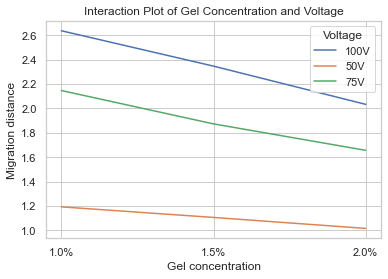

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read the .csv file
data = pd.read_csv("migration_data.csv")

# Reshape the data
long_data = pd.melt(data, id_vars=['Gel concentration', 'Voltage'], var_name='Repeat', value_name='Migration distance')

# Calculate the mean migration distance for each combination of gel concentration and voltage
mean_data = long_data.groupby(['Gel concentration', 'Voltage']).mean().reset_index()

# Create the interaction plot
sns.set(style="whitegrid")
interaction_plot = sns.lineplot(x="Gel concentration", y="Migration distance", hue="Voltage", data=mean_data, markers=True)

plt.title("Interaction Plot of Gel Concentration and Voltage")

# Save the plot (Humans added this line of code)
plt.savefig('interaction_plot.png')

plt.show()


In [3]:
import pandas as pd
import statsmodels.api as sm

# Prepare the data for regression analysis
data = pd.DataFrame({
    'Gel Concentration': [1.0, 1.5, 2.0, 1.0, 1.5, 2.0, 1.0, 1.5, 2.0],
    'Voltage': [50, 50, 50, 75, 75, 75, 100, 100, 100],
    'Mean Distance': [1.193, 1.107, 1.017, 2.147, 1.873, 1.657, 2.637, 2.347, 2.033]
})

# Perform multiple linear regression
X = data[['Gel Concentration', 'Voltage']]
X = sm.add_constant(X)  # Add an intercept to the model
y = data['Mean Distance']

model = sm.OLS(y, X).fit()

# Print the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          Mean Distance   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     71.12
Date:                Sun, 02 Apr 2023   Prob (F-statistic):           6.63e-05
Time:                        23:17:40   Log-Likelihood:                 7.1495
No. Observations:                   9   AIC:                            -8.299
Df Residuals:                       6   BIC:                            -7.707
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.5640      0.23

/Users/yangzijie/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
